In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
##Dataset: https://www.kaggle.com/datasets/adeelsherazi/car-price-analysis

In [45]:
#CSV Imports

#Andrew's Import
cars = pd.read_csv(r'C:\Users\andre\Downloads\Car Prices\automobile.csv')

In [46]:
cars.shape

(201, 26)

In [47]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [48]:
cars.isna().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [49]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [50]:
#Assign columns that are continuous and categorical 
con = cars.select_dtypes(include=['float64','int64']).columns
cat = cars.select_dtypes(include=['object']).columns

In [51]:
#View the categorical variables and their cardinality 
for col in list(cat):
    print(col)
    print(cars[col].value_counts())
    print('\n')

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64


fuel-type
gas       181
diesel     20
Name: fuel-type, dtype: int64


aspiration
std      165
turbo     36
Name: aspiration, dtype: int64


num-of-doors
four    113
two      86
Name: num-of-doors, dtype: int64


body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64


drive-wheels
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64


engine-location
front    198
rear       3
Name: engine-location, dtype: int64


engine-type
ohc      

In [ ]:
# Plan for pre-processing the data

# - Manipulate any of the categorical variables? 
# - Decide what columns to keep. Do this by visualizing and looking at correlation
# - Figure out what to do with the null values
# - Clean/alter the data to assure each feature is in the format we want it to be in

In [52]:
#Group normalized losses by make and replace NA's with the mean of each group 
cars['normalized-losses'] = cars['normalized-losses'].fillna(
    cars.groupby('make')['normalized-losses'].transform('mean'))

In [53]:
cars[cars['normalized-losses'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
42,0,NaN,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,6785
43,2,NaN,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90.0,5000.0,24,29,11048
72,1,NaN,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175.0,5000.0,19,24,16503
126,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
127,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


In [54]:
#Fill remaining NA's with mean grouped by body-style
cars['normalized-losses'] = cars['normalized-losses'].fillna(
    cars.groupby('body-style')['normalized-losses'].transform('mean'))

In [55]:
#Group bore by make and replace NA's with the mean of each group 
cars['bore'] = cars['bore'].fillna(
    cars.groupby('make')['bore'].transform('mean'))

In [56]:
#Group stroke by make and replace NA's with the mean of each group 
cars['stroke'] = cars['stroke'].fillna(
    cars.groupby('make')['stroke'].transform('mean'))

In [57]:
#Group horsepower by make and replace NA's with the mean of each group 
cars['horsepower'] = cars['horsepower'].fillna(
    cars.groupby('body-style')['horsepower'].transform('mean'))

In [58]:
#Group peak-rpm by make and replace NA's with the mean of each group 
cars['peak-rpm'] = cars['peak-rpm'].fillna(
    cars.groupby('body-style')['peak-rpm'].transform('mean'))

In [59]:
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
#NA's for Number of doors

In [26]:
cat

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

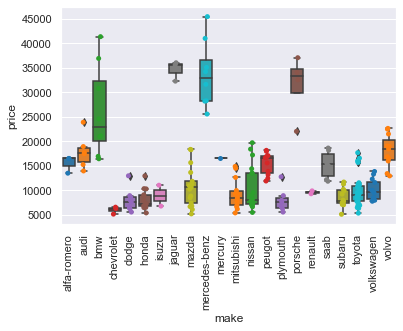

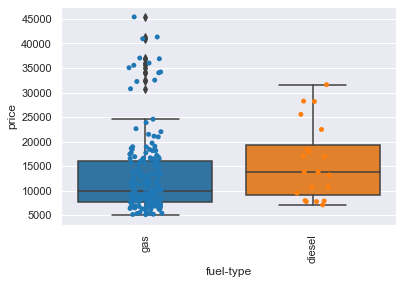

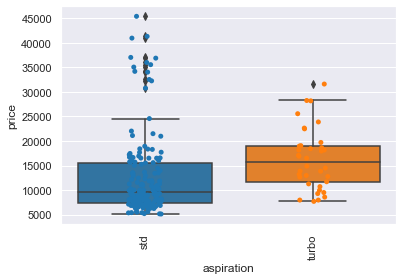

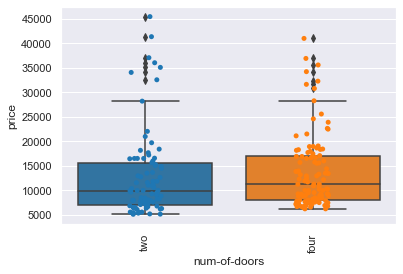

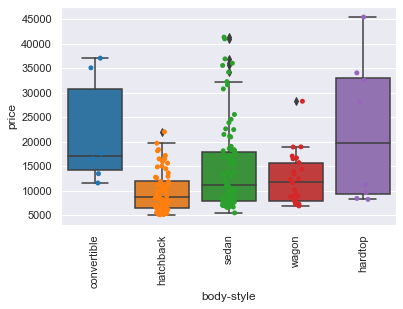

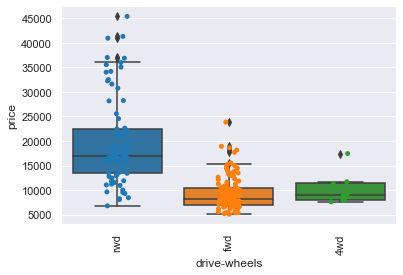

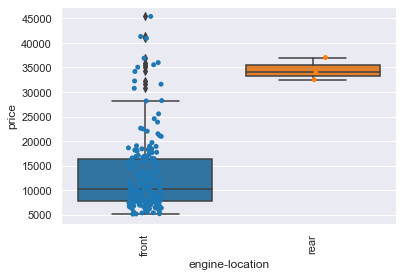

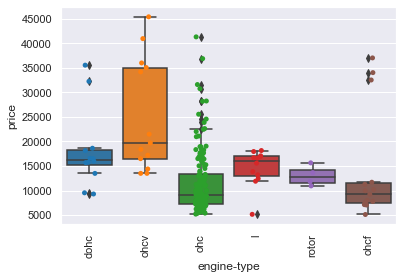

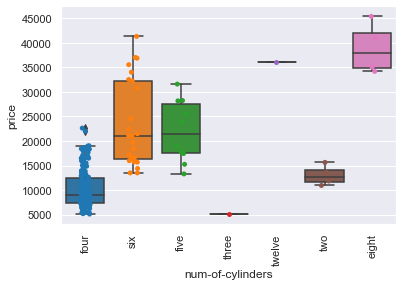

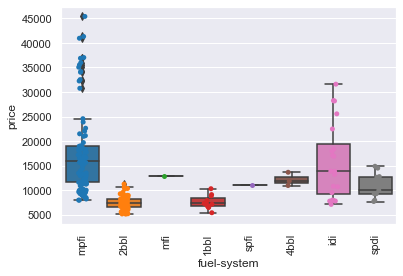

In [30]:
#Visualizing categorical data
for column in list(cat):
    sns.set_theme(style="darkgrid")
    ax = sns.stripplot(x=column, y='price', data=cars, palette = "tab10")
    ax = sns.boxplot(x=column, y='price', data=cars, palette = "tab10")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

In [28]:
con

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

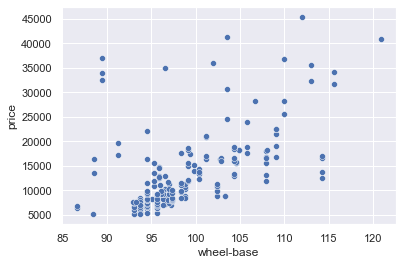

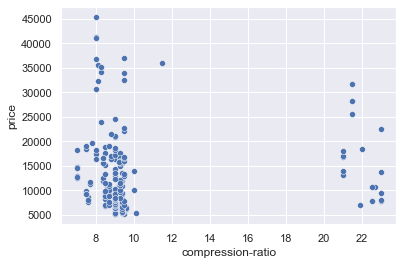

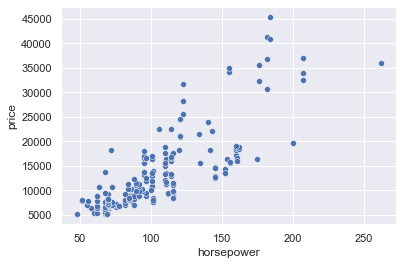

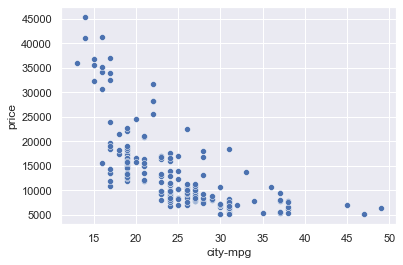

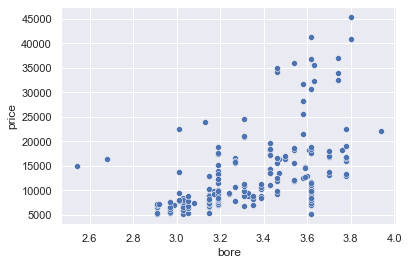

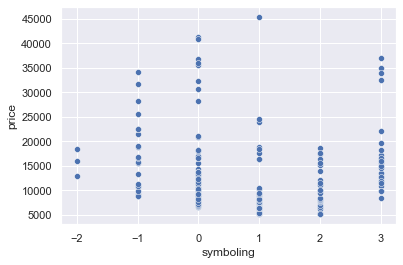

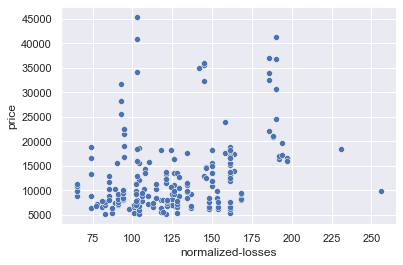

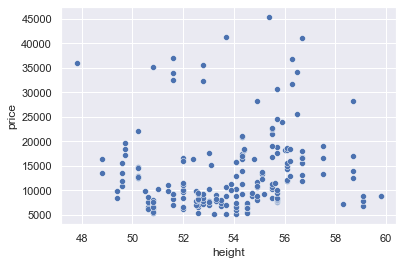

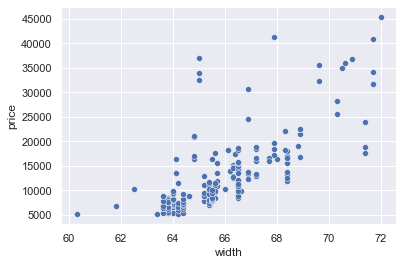

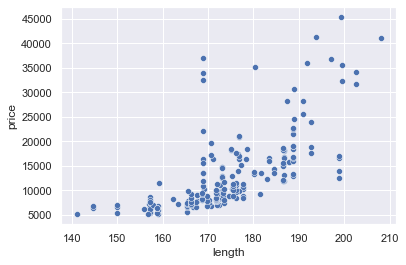

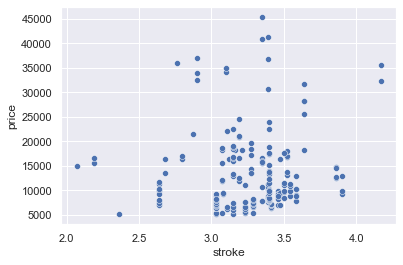

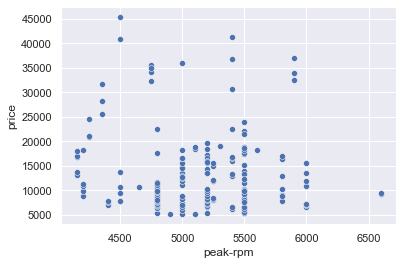

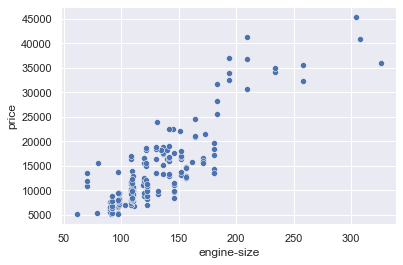

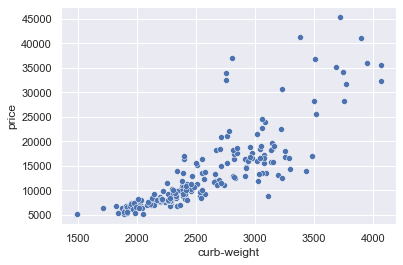

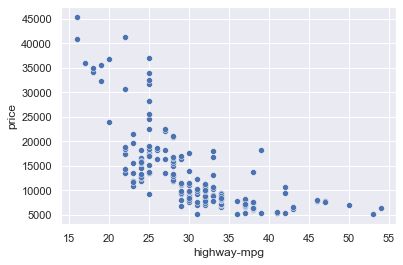

In [33]:
#visualizing continuous data
for column in list(set(con)-set(['price'])): 
    sns.set_theme(style="darkgrid")
    sc = sns.scatterplot(x=column, y='price', data=cars)
    plt.show()

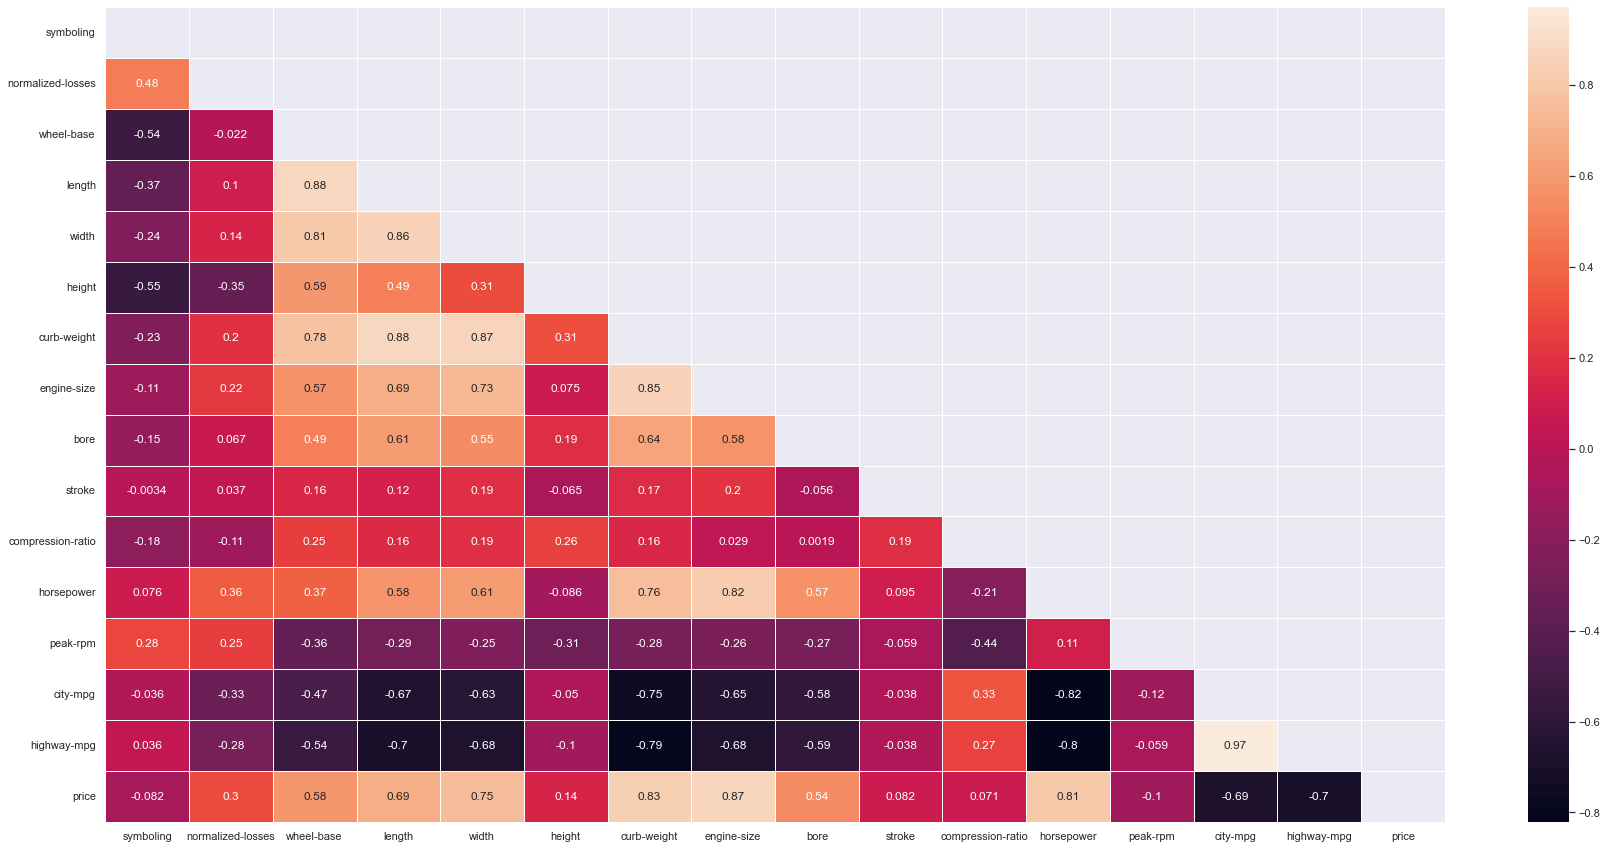

In [61]:
#view correlation coefficients for each varaibles against price
plt.figure(figsize=(30, 15))
correlationMatrix = cars.corr()
mask =np.zeros_like(correlationMatrix)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlationMatrix, annot =True, linewidth = .5, mask=mask)

In [11]:
#Change number of doors and number of cylinders to continuous values
#***Do something with door NA values first 

# cars['num-of-doors'] = cars['num-of-doors'].replace(['two'], 2)
# cars['num-of-doors'] = cars['num-of-doors'].replace(['four'], 4)

# cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['four'], 4)
# cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['six'], 6)
# cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['five'], 5)
# cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['two'], 2)
# cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['eight'], 8)
# cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['three'], 3)
# cars['num-of-cylinders'] = cars['num-of-cylinders'].replace(['twelve'], 12)